# MLP로 이미지 데이터 학습하기

지시사항
이번 실습에서는 CIFAR-10의 학습 데이터셋에서 7500개의 이미지와 테스트 데이터셋에서 500개의 이미지를 따로 뽑아내어 numpy array 파일(.npy 파일)로 구성하여 dataset 폴더 내에 저장되어 있습니다.

따라서 데이터를 불러오기 위해 별도로 ImageDataGenerator를 쓰지 않고, load_cifar10_dastaset 함수에서 바로 이 numpy array를 불러오도록 구현되어 있습니다.

numpy array는 그 자체로 바로 tensorflow의 fit 함수에 사용할 수 있습니다. 이 점 참고하여 코드를 완성하세요.

MLP 모델을 구성하는 함수 build_mlp_model을 완성하세요.
MLP 모델이므로 2차원 이미지를 1차원으로 변형해야 합니다. 맨 먼저 layers.Flatten Layer를 추가하세요.
이후 마지막을 제외한 각 layers.Dense Layer의 노드 개수는 아래와 같습니다. 모두 활성화 함수는 ReLU로 설정하세요.
4096개
1024개
256개
64개
마지막 Layer는 활성화 함수가 Softmax이고 노드 개수는 num_classes개인 layers.Dense Layer입니다.

main 함수에서 optimizer는 Adam으로 설정하세요. Learning rate은 0.001로 설정하세요.

모델의 손실 함수와 평가 지표(metrics)를 아래와 같이 설정하세요. optimizer는 2번에서 불러온 것을 사용합니다.
손실 함수: sparse_categorical_crossentropy
평가 지표(metrics): "accuracy"

모델 학습을 위한 hyperparameter는 아래와 같이 설정하세요.
epochs=epochs
batch_size=64
validation_split=0.2
shuffle=True
verbose=2

In [1]:
from elice_utils import EliceUtils

elice_utils = EliceUtils()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

SEED = 2021

def load_cifar10_dataset():
    train_X = np.load("./dataset/cifar10_train_X.npy")
    train_y = np.load("./dataset/cifar10_train_y.npy")
    test_X = np.load("./dataset/cifar10_test_X.npy")
    test_y = np.load("./dataset/cifar10_test_y.npy")
    
    train_X, test_X = train_X / 255.0, test_X / 255.0
    
    return train_X, train_y, test_X, test_y

def build_mlp_model(img_shape, num_classes=10):
    model = Sequential()

    model.add(Input(shape=img_shape))
    
    # TODO: [지시사항 1번] 모델을 완성하세요.
    model.add(None)

    return model
    
def plot_history(hist):
    train_loss = hist.history["loss"]
    train_acc = hist.history["accuracy"]
    valid_loss = hist.history["val_loss"]
    valid_acc = hist.history["val_accuracy"]
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Train', 'Valid'], loc='upper right')
    plt.savefig("loss.png")
    elice_utils.send_image("loss.png")
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_acc)
    plt.plot(valid_acc)
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.savefig("accuracy.png")
    elice_utils.send_image("accuracy.png")

def main(model=None, epochs=10):
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    
    train_X, train_y, test_X, test_y = load_cifar10_dataset()
    img_shape = train_X[0].shape
    
    # TODO: [지시사항 2번] Adam optimizer를 설정하세요.
    optimizer = None

    mlp_model = model
    if model is None:
        mlp_model = build_mlp_model(img_shape)
    
    # TODO: [지시사항 3번] 모델의 optimizer, 손실 함수, 평가 지표를 설정하세요.
    None
    
    # TODO: [지시사항 4번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = None
    
    plot_history(hist)
    test_loss, test_acc = mlp_model.evaluate(test_X, test_y)
    print("Test Loss: {:.5f}, Test Accuracy: {:.3f}%".format(test_loss, test_acc * 100))
    
    return optimizer, hist

if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'elice_utils'

(32, 32, 3)
Epoch 1/30
94/94 - 4s - 44ms/step - accuracy: 0.1600 - loss: 2.5472 - val_accuracy: 0.2560 - val_loss: 2.0562
Epoch 2/30
94/94 - 4s - 39ms/step - accuracy: 0.2597 - loss: 2.0158 - val_accuracy: 0.2887 - val_loss: 1.9176
Epoch 3/30
94/94 - 3s - 37ms/step - accuracy: 0.3000 - loss: 1.9182 - val_accuracy: 0.3053 - val_loss: 1.8834
Epoch 4/30
94/94 - 3s - 37ms/step - accuracy: 0.3303 - loss: 1.8472 - val_accuracy: 0.3187 - val_loss: 1.8299
Epoch 5/30
94/94 - 3s - 37ms/step - accuracy: 0.3445 - loss: 1.8022 - val_accuracy: 0.3287 - val_loss: 1.7975
Epoch 6/30
94/94 - 4s - 38ms/step - accuracy: 0.3493 - loss: 1.7786 - val_accuracy: 0.3387 - val_loss: 1.7951
Epoch 7/30
94/94 - 4s - 38ms/step - accuracy: 0.3597 - loss: 1.7410 - val_accuracy: 0.3447 - val_loss: 1.7690
Epoch 8/30
94/94 - 4s - 38ms/step - accuracy: 0.3773 - loss: 1.7034 - val_accuracy: 0.3467 - val_loss: 1.7456
Epoch 9/30
94/94 - 4s - 38ms/step - accuracy: 0.3942 - loss: 1.6631 - val_accuracy: 0.3687 - val_loss: 1.734

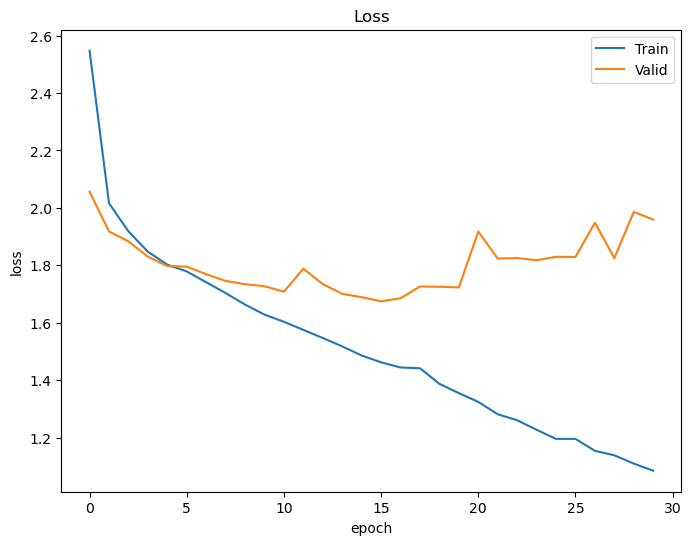

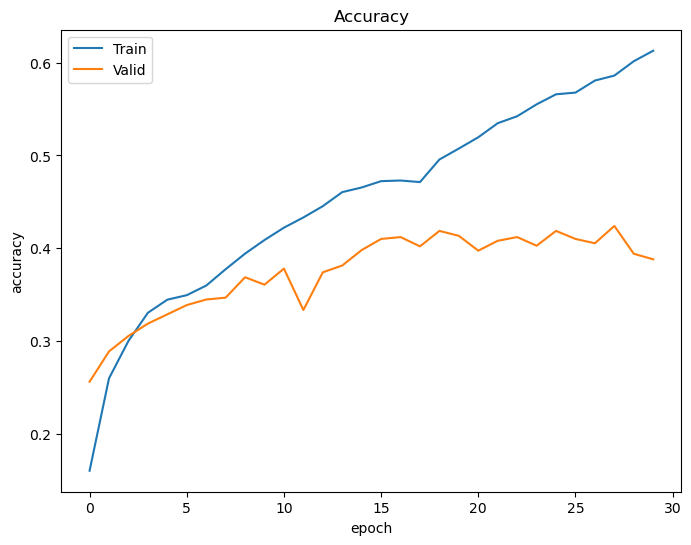

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

SEED = 2021

def load_cifar10_dataset():
    train_X = np.load("./dataset/cifar10_train_X.npy")
    train_y = np.load("./dataset/cifar10_train_y.npy")
    test_X = np.load("./dataset/cifar10_test_X.npy")
    test_y = np.load("./dataset/cifar10_test_y.npy")
    
    train_X, test_X = train_X / 255.0, test_X / 255.0
    
    return train_X, train_y, test_X, test_y

def build_mlp_model(img_shape, num_classes=10):
    model = Sequential()

    model.add(Input(shape=img_shape))

    # TODO: [지시사항 1번] 모델을 완성하세요.
    model.add(tf.keras.layers.Flatten()) # flatten
    model.add(tf.keras.layers.Dense(4096, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    return model
    
def plot_history(hist):
    train_loss = hist.history["loss"]
    train_acc = hist.history["accuracy"]
    valid_loss = hist.history["val_loss"]
    valid_acc = hist.history["val_accuracy"]
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Train', 'Valid'], loc='upper right')
    plt.savefig("loss.png")
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_acc)
    plt.plot(valid_acc)
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.savefig("accuracy.png")

def main(model=None, epochs=30):
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    
    train_X, train_y, test_X, test_y = load_cifar10_dataset()
    img_shape = train_X[0].shape
    print(img_shape)
    
    # TODO: [지시사항 2번] Adam optimizer를 설정하세요.
    optimizer = tf.optimizers.Adam(learning_rate=0.001)

    mlp_model = model
    if model is None:
        mlp_model = build_mlp_model(img_shape)
    
    # TODO: [지시사항 3번] 모델의 optimizer, 손실 함수, 평가 지표를 설정하세요.
    mlp_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # TODO: [지시사항 4번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = mlp_model.fit(train_X, train_y, epochs=epochs, batch_size=64, validation_split=0.2, shuffle=True, verbose=2)
    
    plot_history(hist)
    test_loss, test_acc = mlp_model.evaluate(test_X, test_y)
    print("Test Loss: {:.5f}, Test Accuracy: {:.3f}%".format(test_loss, test_acc * 100))
    
    return optimizer, hist

if __name__ == "__main__":
    main()

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

SEED = 2021

def load_cifar10_dataset():
    train_X = np.load("./dataset/cifar10_train_X.npy")
    train_y = np.load("./dataset/cifar10_train_y.npy")
    test_X = np.load("./dataset/cifar10_test_X.npy")
    test_y = np.load("./dataset/cifar10_test_y.npy")
    
    train_X, test_X = train_X / 255.0, test_X / 255.0
    
    return train_X, train_y, test_X, test_y

def build_mlp_model(img_shape, num_classes=10):
    model = Sequential()
    model.add(Input(shape=img_shape))
    model.add(tf.keras.layers.Conv2D(filters=4096, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(tf.keras.layers.Conv2D(filters=1024, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, padding='SAME'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(10))
    

    return model
    
def plot_history(hist):
    train_loss = hist.history["loss"]
    train_acc = hist.history["accuracy"]
    valid_loss = hist.history["val_loss"]
    valid_acc = hist.history["val_accuracy"]
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Train', 'Valid'], loc='upper right')
    plt.savefig("loss.png")
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_acc)
    plt.plot(valid_acc)
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.savefig("accuracy.png")

def main(model=None, epochs=10):
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    
    train_X, train_y, test_X, test_y = load_cifar10_dataset()
    img_shape = train_X[0].shape
    print(img_shape)
    
    # TODO: [지시사항 2번] Adam optimizer를 설정하세요.
    optimizer = tf.optimizers.Adam(learning_rate=0.001)

    mlp_model = model
    if model is None:
        mlp_model = build_mlp_model(img_shape)
    
    # TODO: [지시사항 3번] 모델의 optimizer, 손실 함수, 평가 지표를 설정하세요.
    mlp_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # TODO: [지시사항 4번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = mlp_model.fit(train_X, train_y, epochs=epochs, batch_size=64, validation_split=0.2, shuffle=True, verbose=2)
    
    plot_history(hist)
    test_loss, test_acc = mlp_model.evaluate(test_X, test_y)
    print("Test Loss: {:.5f}, Test Accuracy: {:.3f}%".format(test_loss, test_acc * 100))
    
    return optimizer, hist

if __name__ == "__main__":
    main()